**ALURA ClASIFICACION**

In [5]:
Perro1 =[0,1,1]
Perro2 =[1,0,1]
Perro3 =[1,1,1]
Gato1 =[0,1,0]
Gato2 =[0,1,0]
Gato3 =[0,1,0]
x_train =[Perro1,Perro2,Perro3,Gato1,Gato2,Gato3]
y_train =[1,1,1,0,0,0]

In [6]:
from sklearn.svm import LinearSVC
model=LinearSVC()
model.fit(x_train,y_train)

LinearSVC()

In [7]:
animal_misterioso =[1,1,1]
model.predict([animal_misterioso])

array([1])

In [8]:
misterio1=[1,1,1]
misterio2=[1,1,0]
misterio3=[0,1,1]
x_train =[misterio1,misterio2,misterio3]
y_train =[0,1,1]

In [9]:
previsiones=model.predict(x_train)

In [10]:
correctos =(previsiones==y_train).sum()
total=len(x_train)
tasa_de_acierto =correctos/total
print(f'La tasa de acierto fue de :{round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de :33.33%


In [11]:
from sklearn.metrics import accuracy_score
tasa_de_acierto =accuracy_score(y_train,previsiones)
print(f'La tasa de acierto fue de :{round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de :33.33%


**CLASE NUMERO 2 Pruebas replicables, estratificación, lectura de datos en internet**

In [12]:
import pandas as pd

In [13]:
uri ='https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
datos=pd.read_csv(uri)
datos.sample(5)


,home,how_it_works,contact,bought
46,1,0,1,1
51,1,1,0,0
80,0,0,1,0
72,0,0,1,0
42,0,1,0,0


In [14]:
mapa={
    'home':'principal',
    'how_it_works':'como_funciona',
    'contact':'contacto',
    'bought':'compro'
}
datos = datos.rename(columns=mapa)
datos.sample(3)

,principal,como_funciona,contacto,compro
38,1,1,0,0
14,0,0,1,0
33,1,0,1,1


In [15]:
x= datos[['principal','como_funciona','contacto']]

In [16]:
y=datos.compro

In [17]:
datos.shape

(99, 4)

In [18]:
x_train=x[:75]
y_train=y[:75]
x_test =x[75:]
y_test=y[75:]

In [19]:
print(f"Entrenaremos con {len(x_train)} elementos y probaremos {len(x_test)} elementos ")

Entrenaremos con 75 elementos y probaremos 24 elementos 


In [20]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
model=LinearSVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_train)
tasa_de_acierto =accuracy_score(y_train,previsiones)
print(f'La tasa de acierto fue de :{round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de :97.33%


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=42)
model=LinearSVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_train)
tasa_de_acierto =accuracy_score(y_train,previsiones)
print(f'La tasa de acierto fue de :{round(tasa_de_acierto*100,2)}%')


La tasa de acierto fue de :97.3%


In [22]:
y_train.value_counts()

compro
0    50
1    24
Name: count, dtype: int64

In [23]:
x_train.value_counts()

principal  como_funciona  contacto
0          0              1           22
1          0              1           21
           1              0           18
0          1              0           10
           0              0            1
           1              1            1
1          1              1            1
Name: count, dtype: int64

In [24]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,random_state=42,stratify=y)
model=LinearSVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_train)
tasa_de_acierto =accuracy_score(y_train,previsiones)
print(f'La tasa de acierto fue de :{round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de :97.3%


In [25]:
y_train.value_counts()

compro
0    49
1    25
Name: count, dtype: int64

In [26]:
uri='https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'

In [27]:
datos=pd.read_csv(uri)

In [28]:
mapa ={
    'unfinished': 'no_finalizado',
    'expected_hours':'horas_esperadas',
    'price':'precio'
}   



In [29]:
datos=datos.rename(columns=mapa)

In [30]:
datos

,no_finalizado,horas_esperadas,precio
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170
...,...,...,...
2152,0,80,7518
2153,1,52,1332
2154,0,40,473
2155,0,75,5324


In [31]:
cambio={1:0,0:1}
datos['finalizado']=datos.no_finalizado.map(cambio)

In [32]:
datos.sample(5)

,no_finalizado,horas_esperadas,precio,finalizado
1300,1,69,4574,0
435,1,69,396,0
2071,0,87,11394,1
2034,0,21,226,1
1554,0,1,271,1


<Axes: xlabel='horas_esperadas', ylabel='precio'>

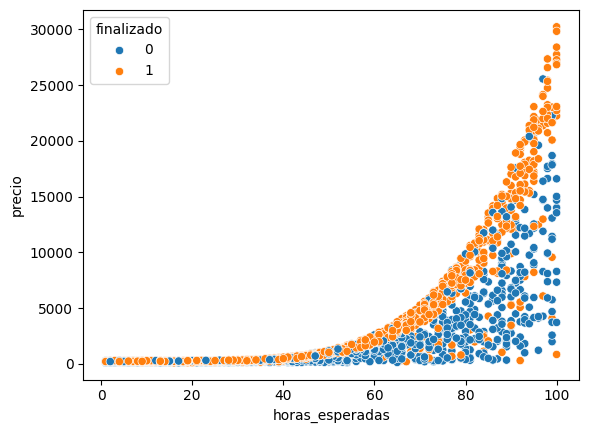

In [33]:
import seaborn as sns
sns.scatterplot(x='horas_esperadas',y='precio',data=datos,hue='finalizado')

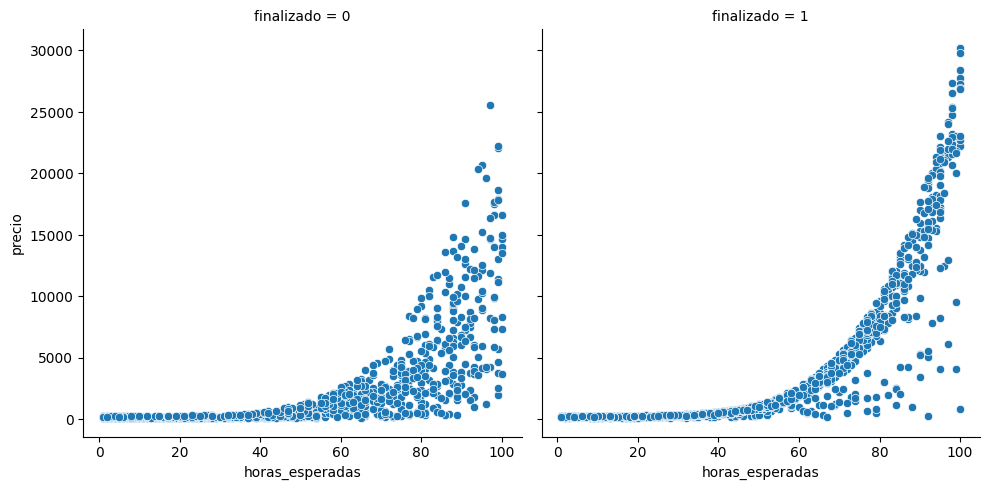

In [34]:
sns.relplot(x='horas_esperadas',y='precio',data=datos,col='finalizado')

In [35]:
import numpy as np
x=datos[['horas_esperadas','precio']]
y=datos['finalizado']
np.random.seed(42)
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,stratify=y)
model=LinearSVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_train)
tasa_de_acierto =accuracy_score(y_train,previsiones)
print(f'La tasa de acierto fue de :{round(tasa_de_acierto*100,2)}%')


La tasa de acierto fue de :56.03%


In [36]:
print(f"Entrenaremos con {len(x_train)} elementos y probaremos {len(x_test)} elementos ")

Entrenaremos con 1617 elementos y probaremos 540 elementos 


In [37]:
base_previsiones=np.ones(540)
tasa_de_acierto=accuracy_score(y_test,base_previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

La tasa de acierto fue de: 52.59%


<Axes: xlabel='horas_esperadas', ylabel='precio'>

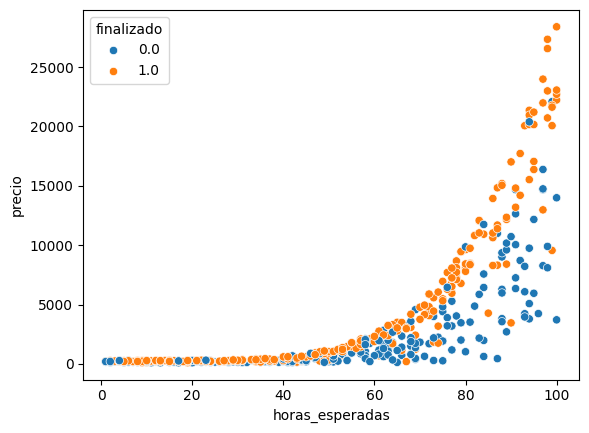

In [38]:
sns.scatterplot(x='horas_esperadas', y='precio',hue=y_test, data=datos)

In [40]:
x_min=x_test.horas_esperadas.min()
x_max=x_test.horas_esperadas.max()
y_min=x_test.precio.min()
y_max=x_test.precio.max()

In [42]:
pixels=100
eje_x=np.arange(x_min,x_max,(x_max-x_min)/pixels)
eje_y=np.arange(y_min,y_max,(y_max-y_min)/pixels)


In [53]:
xx, yy =np.meshgrid(eje_x, eje_y)
puntos=np.c_[xx.ravel(), yy.ravel()]
puntos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [55]:
z = model.predict(puntos)

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [56]:
Z = z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

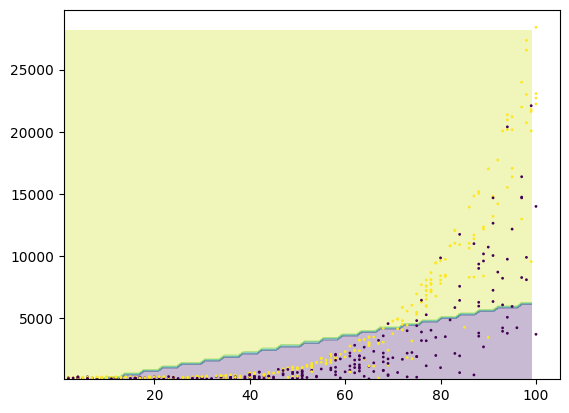

In [58]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s=1)
plt.show()


**Support vectore machines y sistemas no lineales**

Entrenaremos con 1617 elementos y probaremos 540 elementos 


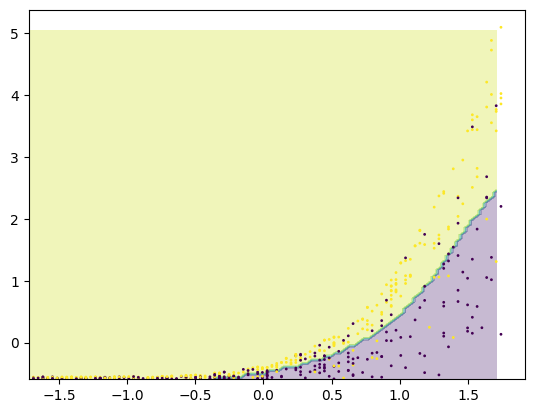

La tasa de acierto fue de :67.78%


In [62]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
x=datos[['horas_esperadas','precio']]
y=datos['finalizado']
np.random.seed(42)
raw_x_train, raw_x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos {len(x_test)} elementos ")
scaler=StandardScaler()
scaler.fit(raw_x_train)
x_train=scaler.transform(raw_x_train)
x_test=scaler.transform(raw_x_test)

model=SVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_test)
data_x = x_test[:,0]
data_y =x_test[:,1]
x_min=data_x.min()
x_max=data_x.max()
y_min=data_y.min()
y_max=data_y.max()
pixels=100
eje_x=np.arange(x_min,x_max,(x_max-x_min)/pixels)
eje_y=np.arange(y_min,y_max,(y_max-y_min)/pixels)
xx, yy =np.meshgrid(eje_x, eje_y)
puntos=np.c_[xx.ravel(), yy.ravel()]
z = model.predict(puntos)
tasa_de_acierto =accuracy_score(y_test,previsiones)
Z = z.reshape(xx.shape)
Z
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s=1)
plt.show()
print(f'La tasa de acierto fue de :{round(tasa_de_acierto*100,2)}%')

**NUEVO DATASET**

In [4]:
URI='https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'

In [5]:
import pandas as pd
datos =pd.read_csv(URI)

In [6]:
datos

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [8]:
mapa = {
    'mileage_per_year':'millas_por_ano',
    'model_year':'ano_del_modelo',
    'price':'precio',
    'sold':'vendido'
}
datos =datos.rename(columns=mapa)
datos.sample(1)

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido
6160,6160,3373,2000,58839.78,no


In [10]:
cambio ={'no':0, 'yes':1}
datos.vendido=datos.vendido.map(cambio)

In [11]:
from datetime import datetime
ano_actual =datetime.today().year
datos['edad_del_modelo']= ano_actual -datos.ano_del_modelo

In [12]:
datos

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10
...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,18
9996,9996,13246,2002,107424.63,1,22
9997,9997,13018,2014,93856.99,0,10
9998,9998,10464,2011,51250.57,1,13


In [13]:
datos['km_por_ano']=datos.millas_por_ano*1.60934

In [14]:
datos

,Unnamed: 0,millas_por_ano,ano_del_modelo,precio,vendido,edad_del_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290
...,...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,18,25060.64248
9996,9996,13246,2002,107424.63,1,22,21317.31764
9997,9997,13018,2014,93856.99,0,10,20950.38812
9998,9998,10464,2011,51250.57,1,13,16840.13376


In [17]:
datos =datos.drop(columns=['Unnamed: 0','millas_por_ano','ano_del_modelo'],axis=1)

In [18]:
datos

,precio,vendido,edad_del_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290
...,...,...,...,...
9995,97112.86,0,18,25060.64248
9996,107424.63,1,22,21317.31764
9997,93856.99,0,10,20950.38812
9998,51250.57,1,13,16840.13376


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

x= datos[['edad_del_modelo','km_por_ano','precio']]
y=datos.vendido
np.random.seed(42)
raw_x_train, raw_x_test, y_train, y_test =train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos {len(x_test)} elementos ")
scaler=StandardScaler()
scaler.fit(raw_x_train)
x_train=scaler.transform(raw_x_train)
x_test=scaler.transform(raw_x_test)

model=SVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_test)
data_x = x_test[:,0]
data_y =x_test[:,1]
x_min=data_x.min()
x_max=data_x.max()
y_min=data_y.min()
y_max=data_y.max()
pixels=100
eje_x=np.arange(x_min,x_max,(x_max-x_min)/pixels)
eje_y=np.arange(y_min,y_max,(y_max-y_min)/pixels)
xx, yy =np.meshgrid(eje_x, eje_y)
puntos=np.c_[xx.ravel(), yy.ravel()]
z = model.predict(puntos)
tasa_de_acierto =accuracy_score(y_test,previsiones)
Z = z.reshape(xx.shape)
Z
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=y_test, s=1)
plt.show()
print(f'La tasa de acierto fue de :{round(tasa_de_acierto*100,2)}%')